In [14]:
#bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ctl
import sympy as sp

In [46]:
# 1ºPasso - levantamento de requisito do sistema não compensado
#
#função de Transferencia
# G(s) = 1/s(0.1s+1) => G(s) = 1/ 0.1s^2+ s
num = np.array([1])
den = np.array([0.1,1,0])
G_s = ctl.tf(num,den)
print(G_s)


     1
-----------
0.1 s^2 + s



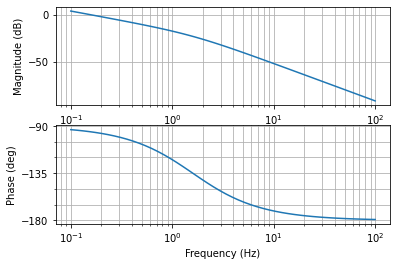

In [38]:
#bode do sistema não compensado
mag, phase, omega = ctl.bode(G_s)


In [59]:
gm, pm, wg, wp = ctl.margin(G_s)
print('==================SISTEMA NÃO COMPENSADO====================')
#print('Margem de ganho:',gm)
print('Margem de fase:',pm)
#print('Frequencia para margem de ganho', wg)
print('Frequencia para margem de fase',wp)
#kv = limite s->0 s* G(s) = 1
kv = 1
print('kv = limite s->0 s* G(s) = ',kv)
print('=======================================================')


==================SISTEMA NÃO COMPENSADO====================
Margem de fase: 84.31728748228102
Frequencia para margem de fase 0.9950854917683446
kv = limite s->0 s* G(s) =  1


In [45]:
# --------------------- requisito de novo Kv ------------
#                    NOVO_KV = limite s->0 s*G_s*kc
#                             20 = kc * 1
#                                 kc = 20 
#
#--------------------------------------------------------
kc = 20
kv = kc
kc_db = 20*np.log10(kc)
print('KC =',kc_db,"dB")

KC = 26.020599913279625 dB


In [62]:
#- 2º Passso - levantamento de dados do sistema utilizando Kc 
#
#                                  Diagrama de bloco do kc
#
#                imput -->()---|kc|--|G(s)|----->Output
#                         |                   |
#                         --------------------
#

G = ctl.feedback(G_s,1)
G = kc*G
print(G)


      20
---------------
0.1 s^2 + s + 1



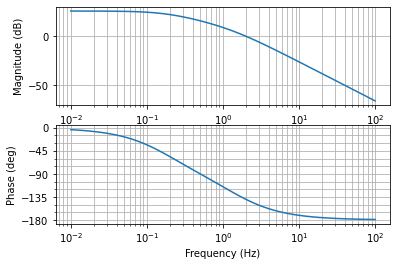

In [63]:
# bode do sistema compensado apenas com  kc
mag, phase, omega = ctl.bode(G)

In [64]:
gm, pm, wg, wp = ctl.margin(G)
print('==================SISTEMA NÃO COMPENSADO====================')
#print('Margem de ganho:',gm)
print('Margem de fase:',pm)
#print('Frequencia para margem de ganho', wg)
print('Frequencia para margem de fase',wp)
#kv = limite s->0 s* G(s) = 20
kv = 20
print('kv = limite s->0 s* G(s) = ',kv)
print('=======================================================')

==================SISTEMA NÃO COMPENSADO====================
Margem de fase: 39.77368454621853
Frequencia para margem de fase 12.795135320684718
kv = limite s->0 s* G(s) =  20
